In [18]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# --- 1. Preprocessing and Basic Transforms (no augmentation) ---
transform_basic = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [19]:
# --- 2. Load Custom Digits for Training ---
def ProjectDataLoader(path='./digits', transform=None):
    images, labels = [], []
    for filename in os.listdir(path):
        if filename.endswith('.png'):
            label = int(filename.split('-')[0])
            img_path = os.path.join(path, filename)
            img = Image.open(img_path).convert('L').resize((28, 28))
            if transform:
                img = transform(img)
            else:
                img = transforms.ToTensor()(img)
            images.append(img)
            labels.append(label)
    return torch.stack(images), torch.tensor(labels).long().squeeze()

custom_batch, custom_labels_tensor = ProjectDataLoader('./digits', transform=transform_basic)
custom_dataset = TensorDataset(custom_batch, custom_labels_tensor)
trainloader = DataLoader(custom_dataset, batch_size=16, shuffle=True)

In [20]:
# --- 3. Load MNIST for Testing Only ---
testset = datasets.MNIST('MNIST_data', train=False, download=True, transform=transform_basic)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --- 4. Define the Bigger MLP Model ---
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

Epoch 1 Loss: 2.3281
Epoch 2 Loss: 2.3129
Epoch 3 Loss: 2.3051
Epoch 4 Loss: 2.3026
Epoch 5 Loss: 2.2791
Epoch 6 Loss: 2.2695
Epoch 7 Loss: 2.2240
Epoch 8 Loss: 2.1445
Epoch 9 Loss: 2.1198
Epoch 10 Loss: 2.0091
Epoch 11 Loss: 1.9059
Epoch 12 Loss: 1.8671
Epoch 13 Loss: 1.8260
Epoch 14 Loss: 1.7901
Epoch 15 Loss: 1.6372
Epoch 16 Loss: 1.6755
Epoch 17 Loss: 1.5737
Epoch 18 Loss: 1.5880
Epoch 19 Loss: 1.6255
Epoch 20 Loss: 1.5658
Epoch 21 Loss: 1.4635
Epoch 22 Loss: 1.4207
Epoch 23 Loss: 1.4163
Epoch 24 Loss: 1.4958
Epoch 25 Loss: 1.3510
Epoch 26 Loss: 1.3932
Epoch 27 Loss: 1.3891
Epoch 28 Loss: 1.3473
Epoch 29 Loss: 1.3713
Epoch 30 Loss: 1.2437
Epoch 31 Loss: 1.3009
Epoch 32 Loss: 1.2239
Epoch 33 Loss: 1.1944
Epoch 34 Loss: 1.2175
Epoch 35 Loss: 1.1984
Epoch 36 Loss: 1.1333
Epoch 37 Loss: 1.1996
Epoch 38 Loss: 1.1735
Epoch 39 Loss: 1.0539
Epoch 40 Loss: 1.1809
Epoch 41 Loss: 1.1881
Epoch 42 Loss: 1.1158
Epoch 43 Loss: 1.0451
Epoch 44 Loss: 0.9832
Epoch 45 Loss: 1.0376
Epoch 46 Loss: 1.01

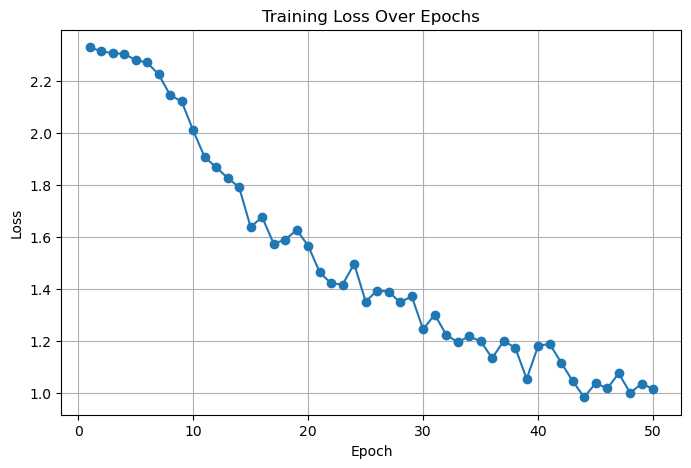

In [21]:
# --- 5. Setup Loss and Optimizer ---
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- 6. Training Loop (No Transformations) ---
loss_history = []
for epoch in range(50):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f}")

# --- 7. Plot Training Loss ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Accuracy on MNIST test set: 45.77%


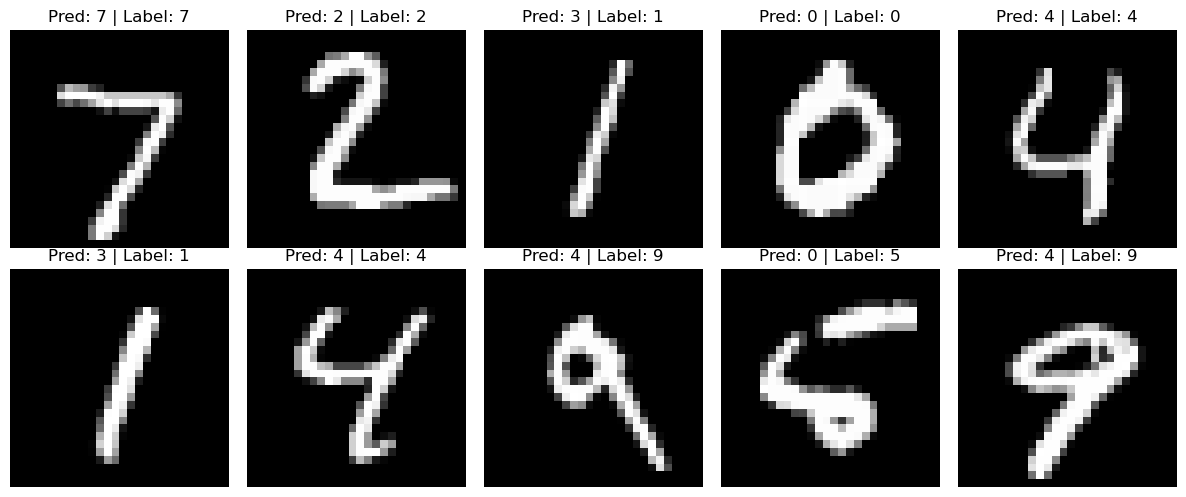

In [22]:
# --- 8. Testing on MNIST Test Set ---
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nAccuracy on MNIST test set: {100 * correct / total:.2f}%")

# --- 9. (Optional) Visualize a Few Test Predictions ---
def show_mnist_predictions(model, testloader):
    model.eval()
    images, labels = next(iter(testloader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axs = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title(f"Pred: {preds[i].item()} | Label: {labels[i].item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

show_mnist_predictions(model, testloader)